In [5]:
#Python Notebook for Exploratory Analysis on NSDUH dataset
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [6]:
#1.Look at summary statistics for both types of diagnostic variables, and identify the response variables for seeking treatment. 
#Mental Health: Among those who are coded SPDYR = 1(subsample of 5696), 
#find predictors of AMHTXRC3 = 1(received any mental health trt past year)

#SPDYR is grouping var, AMHTXRC3 is response var, others are possible predictors
#AMHSVTYP(type of mental health treatment received in past year: coded 1-8) see pg 450(484)
#AMHTXND2(perceived need for mental health treatment in past year: . is unknown, 1 yes, 2 no)
mdiag_cols = ['CASEID','AMHTXRC3','AMHSVTYP','AMHTXND2','SPDYR','SPDMON','K6SCYR','K6SCMON','K6SCMAX','WHODASC2',
              'SMIPP_U','AMDELT','AMDEYR','ATXMDEYR','ARXMDEYR','IRINSUR4','GOVTPROG',
              'INCOME','POVERTY2','IRSEX','IRMARIT','HEALTH2','CATAG3','NEWRACE2','EDUCCAT2']
Mental_Diagnostics = pd.read_csv('C:/Users/Cody/Downloads/NSDUH/2014/NSDUH-2014-DS0001-data/NSDUH-2014-DS0001-data-excel.tsv',usecols=mdiag_cols, sep='\t', index_col=0)

In [7]:
Mental_Diagnostics.describe()

,AMHTXRC3,AMHSVTYP,AMHTXND2,K6SCMON,SPDMON,K6SCYR,K6SCMAX,SPDYR,WHODASC2,SMIPP_U,...,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,...,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000
mean,-0.860451,3.280075,-0.790270,1.017568,-2.167158,-4.242044,1.975123,-2.111487,0.792278,-2.181120,...,1.760164,2.585027,2.277343,1.121854,1.523765,14.387925,2.799533,2.551682,3.270504,2.182428
std,4.706729,7.232871,4.735816,6.948001,3.909216,8.867231,8.063145,3.946625,7.296613,3.897089,...,0.426987,1.138994,1.358044,0.327120,0.499439,31.407447,1.426004,2.366211,1.324381,0.952305
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,1.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000
25%,1.000000,-9.000000,1.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.002541,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,8.000000,2.000000,2.000000,0.000000,-9.000000,2.000000,0.000000,0.000000,0.008998,...,2.000000,2.000000,3.000000,1.000000,2.000000,4.000000,3.000000,1.000000,3.000000,2.000000
75%,2.000000,8.000000,2.000000,5.000000,0.000000,-9.000000,6.000000,0.000000,4.000000,0.008998,...,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,4.000000,5.000000,4.000000,3.000000
max,2.000000,8.000000,2.000000,24.000000,1.000000,24.000000,24.000000,1.000000,24.000000,0.929121,...,2.000000,4.000000,3.000000,2.000000,2.000000,99.000000,5.000000,7.000000,5.000000,4.000000


In [8]:
#change to N/A for missing data
Mental_Diagnostics.replace(-9, np.nan, inplace=True)
Mental_Diagnostics.IRMARIT.replace(99,np.nan,inplace=True)#1-married,2-widowed,3-seperated/div,4-never married
#change vars coded 1:yes, 2:no --> 1:yes, 0:no 
Mental_Diagnostics.AMHTXRC3.replace(2,0,inplace=True)#received any mental health trt past year
Mental_Diagnostics.AMHTXND2.replace(2,0,inplace=True)#perceived need for mental health treatment in past year
Mental_Diagnostics.AMDELT.replace(2,0,inplace=True)#lifetime major depressive episode
Mental_Diagnostics.AMDEYR.replace(2,0,inplace=True)#past year major depressive episode
Mental_Diagnostics.GOVTPROG.replace(2,0,inplace=True)#participate in government assistance programs
Mental_Diagnostics.IRINSUR4.replace(2,0,inplace=True)#1-has insurance, 0-no insurance
Mental_Diagnostics.IRSEX.replace(2,0,inplace=True)#1-male, 0-female
Mental_Diagnostics.describe()

,AMHTXRC3,AMHSVTYP,AMHTXND2,K6SCMON,SPDMON,K6SCYR,K6SCMAX,SPDYR,WHODASC2,SMIPP_U,...,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,41466.000000,41427.000000,41492.000000,41671.000000,41671.000000,13632.000000,41671.000000,41671.000000,41671.000000,41671.000000,...,55271.000000,55271.000000,54751.000000,55271.000000,55271.000000,48588.000000,55271.000000,55271.000000,55271.000000,55251.000000
mean,0.150605,7.383808,0.063916,4.286962,0.062849,10.291153,5.557030,0.136690,3.988145,0.044330,...,0.239836,2.585027,2.384450,0.878146,0.476235,2.750021,2.799533,2.551682,3.270504,2.186476
std,0.357668,1.600248,0.244606,4.537507,0.242695,6.199324,5.838672,0.343524,5.395138,0.125902,...,0.426987,1.138994,0.801514,0.327120,0.499439,1.391708,1.426004,2.366211,1.324381,0.928403
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002541,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,8.000000,0.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.007445,...,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,0.000000,8.000000,0.000000,3.000000,0.000000,10.000000,4.000000,0.000000,1.000000,0.008998,...,0.000000,2.000000,3.000000,1.000000,0.000000,4.000000,3.000000,1.000000,3.000000,2.000000
75%,0.000000,8.000000,0.000000,6.000000,0.000000,15.000000,8.000000,0.000000,6.000000,0.012713,...,0.000000,4.000000,3.000000,1.000000,1.000000,4.000000,4.000000,5.000000,4.000000,3.000000
max,1.000000,8.000000,1.000000,24.000000,1.000000,24.000000,24.000000,1.000000,24.000000,0.929121,...,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,5.000000,4.000000


In [9]:
mh_sample = Mental_Diagnostics[Mental_Diagnostics.SPDYR==1]
mh_sample.describe()
#SPDYR = 1(subsample of 5696 adults) experienced psychological distress this past year

,AMHTXRC3,AMHSVTYP,AMHTXND2,K6SCMON,SPDMON,K6SCYR,K6SCMAX,SPDYR,WHODASC2,SMIPP_U,...,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,5679.000000,5664.000000,5678.000000,5696.000000,5696.000000,4829.000000,5696.000000,5696.0,5696.000000,5696.000000,...,5696.000000,5696.000000,5588.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5695.000000
mean,0.445325,6.372881,0.294470,11.734551,0.459796,17.196935,17.309340,1.0,11.943294,0.226220,...,0.343574,2.193820,2.170186,0.826369,0.350948,3.044593,2.980513,2.413799,2.576194,2.615101
std,0.497045,2.165682,0.455844,5.319216,0.498425,3.747292,3.516746,0.0,6.258279,0.259794,...,0.474943,1.098009,0.850057,0.378825,0.477309,1.272846,1.064458,2.294922,0.982635,0.973147
min,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,13.000000,1.0,0.000000,0.004284,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,0.000000,6.000000,0.000000,8.000000,0.000000,14.000000,14.000000,1.0,8.000000,0.029295,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,0.000000,8.000000,0.000000,12.000000,0.000000,17.000000,17.000000,1.0,12.000000,0.105737,...,0.000000,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,1.000000,3.000000,3.000000
75%,1.000000,8.000000,1.000000,15.000000,1.000000,19.000000,19.000000,1.0,16.000000,0.352628,...,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,1.000000,8.000000,1.000000,24.000000,1.000000,24.000000,24.000000,1.0,24.000000,0.929121,...,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,4.000000,4.000000


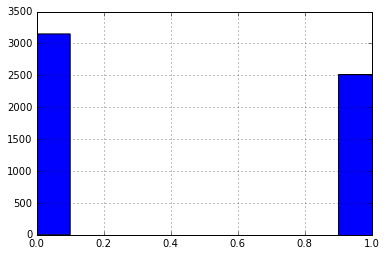

In [10]:
mh_sample.AMHTXRC3.hist()
#It looks to be about a half and half split 
#Slightly less than half of adults experiencing serious psychological distress in the 
#past year did not receive any form of mental health treatment in the past year.


#I need to find variables that will predict a 1 value for AMHTXRC3
#Therefore, I will split into mh_sample[AMHTXRC3=1] and mh_sample[AMHTXRC3=0]

In [11]:
recv_trt = mh_sample[mh_sample.AMHTXRC3==1]
recv_trt.count().head()
#2529 response = 1

AMHTXRC3    2529
AMHSVTYP    2514
AMHTXND2    2523
K6SCMON     2529
SPDMON      2529
dtype: int64

In [12]:
no_trt = mh_sample[mh_sample.AMHTXRC3==0]
no_trt.count().head()
#3150 response = 0

AMHTXRC3    3150
AMHSVTYP    3150
AMHTXND2    3144
K6SCMON     3150
SPDMON      3150
dtype: int64

0.0    1546
1.0     977
Name: AMHTXND2, dtype: int64

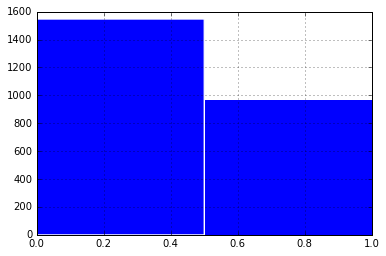

In [13]:
recv_trt.AMHTXND2.hist(bins=2,edgecolor='w', lw=1)
recv_trt.AMHTXND2.value_counts()
#39 pct of those who receive mh trt have a perceived need for trt

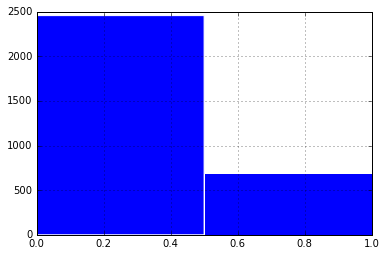

In [14]:
no_trt.AMHTXND2.hist(bins=2,edgecolor='w', lw=1)
no_trt.AMHTXND2.value_counts()
#while only 22 pct of those who don't receive trt have a perceived need for trt 
#(1/5 people who think they need mh trt and need it aren't getting it for whatever reason) ~look at just this group later
unable_trt = no_trt[no_trt.AMHTXND2 == 1]

count    2529.000000
mean       12.129696
std         5.208146
min         0.000000
25%         8.000000
50%        12.000000
75%        16.000000
max        24.000000
Name: K6SCMON, dtype: float64

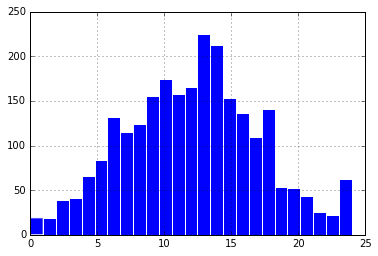

In [15]:
recv_trt.K6SCMON.hist(bins=25,edgecolor='w', lw=1) #0-24 var so 24 bins
recv_trt.K6SCMON.describe()

count    3150.000000
mean       11.394603
std         5.375589
min         0.000000
25%         7.000000
50%        11.000000
75%        15.000000
max        24.000000
Name: K6SCMON, dtype: float64

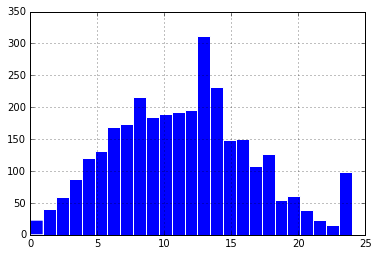

In [16]:
no_trt.K6SCMON.hist(bins=25,edgecolor='w', lw=1) #0-24 var so 24 bins
no_trt.K6SCMON.describe()
#no discernable difference between the groups for K6SCMON

count    2529.000000
mean        0.488731
std         0.499972
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SPDMON, dtype: float64

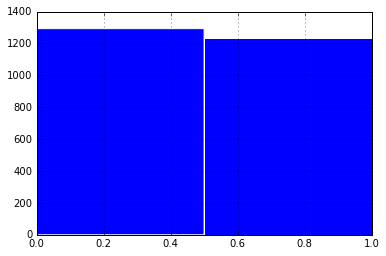

In [17]:
recv_trt.SPDMON.hist(bins=2,edgecolor='w', lw=1)
recv_trt.SPDMON.describe()

count    3150.000000
mean        0.434286
std         0.495742
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SPDMON, dtype: float64

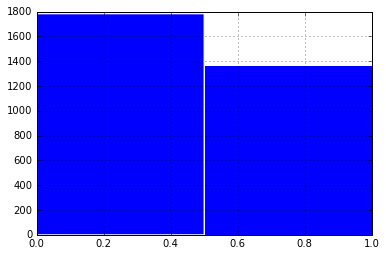

In [18]:
no_trt.SPDMON.hist(bins=2,edgecolor='w', lw=1)
no_trt.SPDMON.describe()
#diff between groups is roughly 5 pct, not significant enough
#It makes sense that measures of the past month would not be predictive for obtaining trt in past year

count    2173.000000
mean       17.897837
std         3.773351
min         3.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        24.000000
Name: K6SCYR, dtype: float64

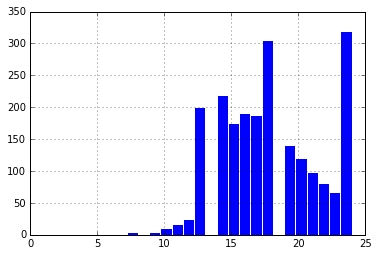

In [19]:
recv_trt.K6SCYR.hist(bins=25,edgecolor='w', lw=1) #0-24 var so 25 bins
recv_trt.K6SCYR.describe()

count    2643.000000
mean       16.621642
std         3.617271
min         4.000000
25%        14.000000
50%        16.000000
75%        18.000000
max        24.000000
Name: K6SCYR, dtype: float64

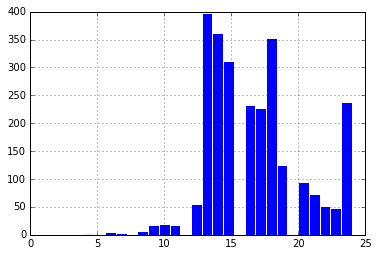

In [20]:
no_trt.K6SCYR.hist(bins=25,edgecolor='w', lw=1) #0-24 var so 25 bins
no_trt.K6SCYR.describe()
#would be interesting to see this var again on only those who had perceived need for trt and recv trt
#may be a useful predictor: range of top 50% who recv trt same as range of top 25% who don't (18-24)

count    2529.000000
mean       17.864373
std         3.574616
min        13.000000
25%        15.000000
50%        18.000000
75%        20.000000
max        24.000000
Name: K6SCMAX, dtype: float64

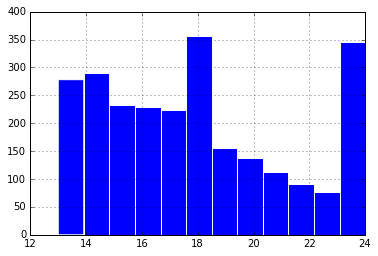

In [21]:
recv_trt.K6SCMAX.hist(bins=12,edgecolor='w', lw=1) #13-24 var so 12 bins
recv_trt.K6SCMAX.describe()

count    3150.000000
mean       16.857778
std         3.402420
min        13.000000
25%        14.000000
50%        16.000000
75%        19.000000
max        24.000000
Name: K6SCMAX, dtype: float64

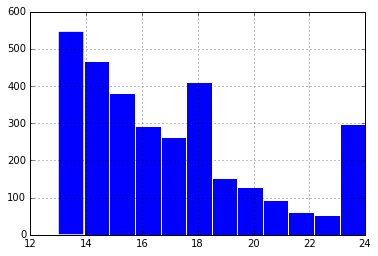

In [22]:
no_trt.K6SCMAX.hist(bins=12,edgecolor='w', lw=1) #13-24 var so 12 bins
no_trt.K6SCMAX.describe()
#this may also be a useful predictor with more high K6 scores for recv trt group

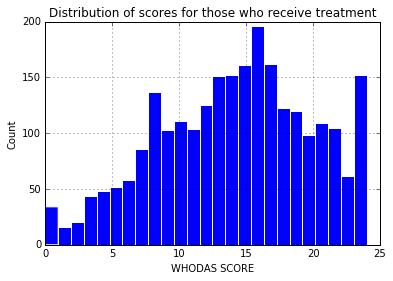

In [87]:
recv_trt.WHODASC2.hist(bins=25,edgecolor='w', lw=1) #0-24 var so 25 bins
recv_trt.WHODASC2.describe()
plt.title("Distribution of scores for those who receive treatment")
plt.xlabel("WHODAS SCORE")
plt.ylabel("Count")

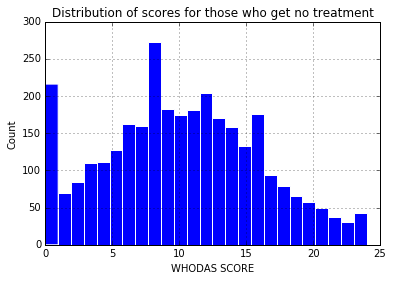

In [88]:
no_trt.WHODASC2.hist(bins=25,edgecolor='w', lw=1) #0-24 var so 25 bins
no_trt.WHODASC2.describe()
plt.title("Distribution of scores for those who get no treatment")
plt.xlabel("WHODAS SCORE")
plt.ylabel("Count")
#the whodas score seems to be fairly indicative of someone who received trt, good predictor

count    2529.000000
mean        0.322128
std         0.286116
min         0.004284
25%         0.071654
50%         0.226875
75%         0.523469
max         0.929121
Name: SMIPP_U, dtype: float64

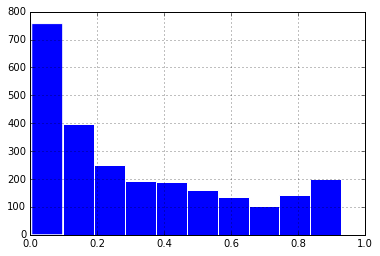

In [25]:
recv_trt.SMIPP_U.hist(edgecolor='w', lw=1)
recv_trt.SMIPP_U.describe()

count    3150.000000
mean        0.149906
std         0.207352
min         0.004284
25%         0.020405
50%         0.053314
75%         0.188748
max         0.929121
Name: SMIPP_U, dtype: float64

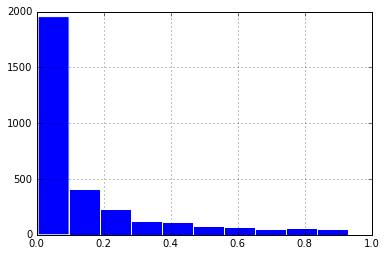

In [26]:
no_trt.SMIPP_U.hist(edgecolor='w', lw=1)
no_trt.SMIPP_U.describe()
#this var is predicted probability of serious mental illness, so may be a little too easy, but seems very predictive
#I should look into the documentation of how this is calculated

count    2515.000000
mean        0.683101
std         0.465360
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: AMDELT, dtype: float64

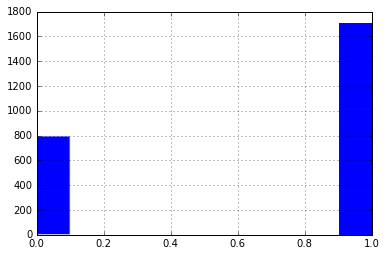

In [27]:
recv_trt.AMDELT.hist(edgecolor='w', lw=1)
recv_trt.AMDELT.describe()
#68 pct of those who recv trt experienced a major depressive episode in their lifetime

count    3131.000000
mean        0.432769
std         0.495539
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: AMDELT, dtype: float64

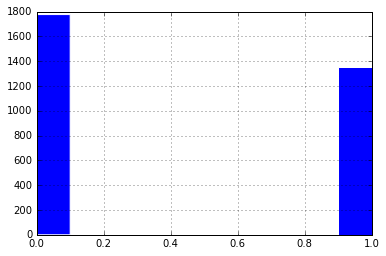

In [28]:
no_trt.AMDELT.hist(edgecolor='w', lw=1)
no_trt.AMDELT.describe()
#43 pct of those who get no trt experienced a major depressive episode in their lifetime
#this seems like a significant difference that could be predictive

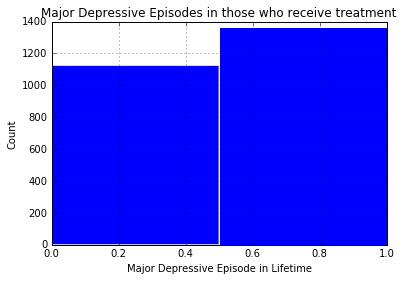

In [92]:
recv_trt.AMDEYR.hist(bins=2, edgecolor='w', lw=1)
recv_trt.AMDEYR.describe()
plt.title("Major Depressive Episodes in those who receive treatment")
plt.xlabel("Major Depressive Episode in Lifetime")
plt.ylabel("Count")
#55 pct of those who recv trt experienced a major depressive episode in the past year

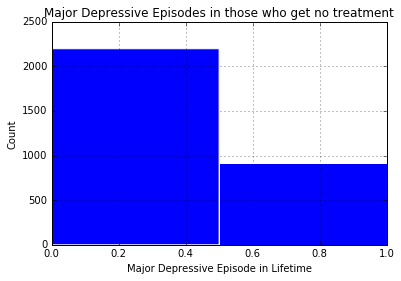

In [93]:
no_trt.AMDEYR.hist(bins=2, edgecolor='w', lw=1)
no_trt.AMDEYR.describe()
plt.title("Major Depressive Episodes in those who get no treatment")
plt.xlabel("Major Depressive Episode in Lifetime")
plt.ylabel("Count")
#29 pct of those who get no trt experienced a major depressive episode in the past year
#this is an even bigger difference that is likely predictive

count    1724.000000
mean        0.856148
std         0.351041
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ATXMDEYR, dtype: float64

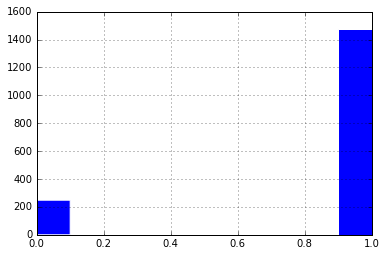

In [31]:
recv_trt.ATXMDEYR.hist(edgecolor='w', lw=1)
recv_trt.ATXMDEYR.describe()

count    1369.000000
mean        0.200146
std         0.400256
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ATXMDEYR, dtype: float64

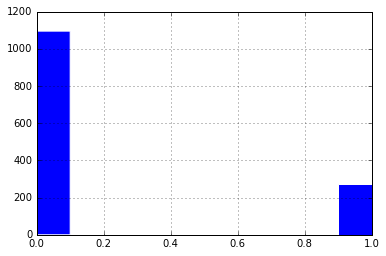

In [32]:
no_trt.ATXMDEYR.hist(edgecolor='w', lw=1)
no_trt.ATXMDEYR.describe()
#this may be too similar to the response variable, because it stands for whether or not saw or talked to md/prof for major depressive episode in past year

count    1725.000000
mean        0.815072
std         0.388351
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ARXMDEYR, dtype: float64

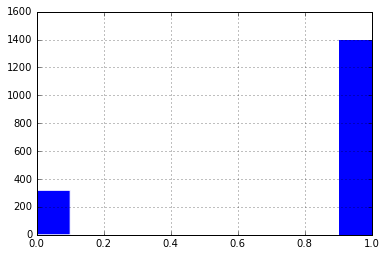

In [33]:
recv_trt.ARXMDEYR.hist(edgecolor='w', lw=1)
recv_trt.ARXMDEYR.describe()

count    1371.000000
mean        0.054705
std         0.227486
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ARXMDEYR, dtype: float64

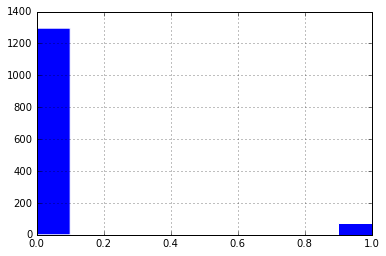

In [34]:
no_trt.ARXMDEYR.hist(edgecolor='w', lw=1)
no_trt.ARXMDEYR.describe()
#also may be too similar to the response variable, because it stands for whether or not used rx medication for major depressive episode in past year

count    2529.000000
mean        0.883353
std         0.321063
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: IRINSUR4, dtype: float64

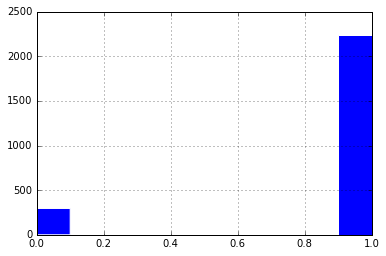

In [35]:
recv_trt.IRINSUR4.hist(edgecolor='w', lw=1)
recv_trt.IRINSUR4.describe()
#88 pct have insurance

count    3150.000000
mean        0.780952
std         0.413667
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: IRINSUR4, dtype: float64

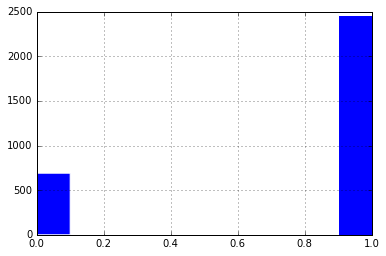

In [36]:
no_trt.IRINSUR4.hist(edgecolor='w', lw=1)
no_trt.IRINSUR4.describe()
#only 78 pct have insurance, not sure if this difference is substansial enough

count    2529.000000
mean        0.374852
std         0.484180
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: GOVTPROG, dtype: float64

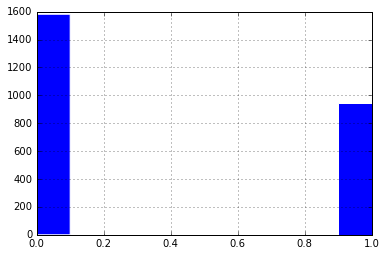

In [37]:
recv_trt.GOVTPROG.hist(edgecolor='w', lw=1)
recv_trt.GOVTPROG.describe()
# 37 pct of those who recv trt have govt assistance

count    3150.000000
mean        0.318095
std         0.465811
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: GOVTPROG, dtype: float64

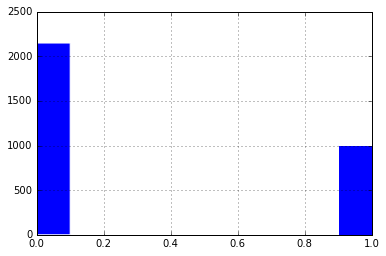

In [38]:
no_trt.GOVTPROG.hist(edgecolor='w', lw=1)
no_trt.GOVTPROG.describe()
# 32 pct of those who get no trt have govt assistance

1    865
2    791
4    528
3    345
Name: INCOME, dtype: int64

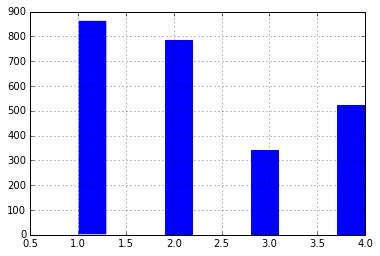

In [39]:
recv_trt.INCOME.hist(edgecolor='w', lw=1)
recv_trt.INCOME.value_counts()

2    1120
1    1014
4     570
3     446
Name: INCOME, dtype: int64

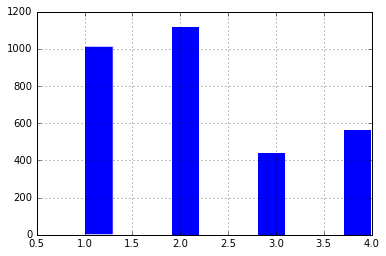

In [40]:
no_trt.INCOME.hist(edgecolor='w', lw=1)
no_trt.INCOME.value_counts()
#no discernable diff

3.0    1184
1.0     736
2.0     572
Name: POVERTY2, dtype: int64

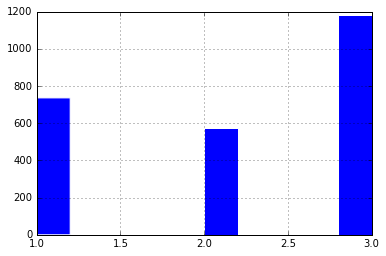

In [41]:
recv_trt.POVERTY2.hist(edgecolor='w', lw=1)
recv_trt.POVERTY2.value_counts()

3.0    1387
1.0     878
2.0     814
Name: POVERTY2, dtype: int64

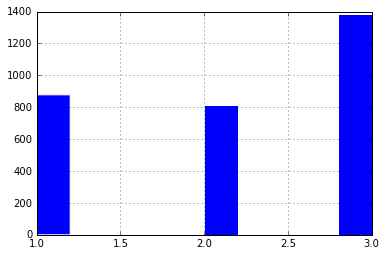

In [42]:
no_trt.POVERTY2.hist(edgecolor='w', lw=1)
no_trt.POVERTY2.value_counts()
#no discernable diff

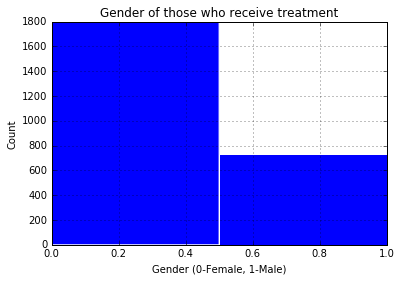

In [94]:
recv_trt.IRSEX.hist(bins=2,edgecolor='w', lw=1)
recv_trt.IRSEX.describe()
plt.title("Gender of those who receive treatment")
plt.xlabel("Gender (0-Female, 1-Male)")
plt.ylabel("Count")

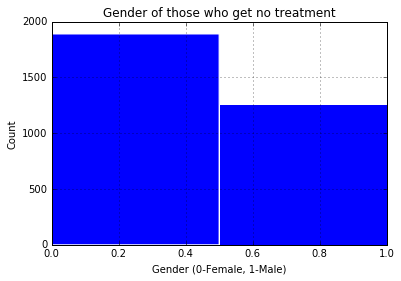

In [96]:
no_trt.IRSEX.hist(bins=2, edgecolor='w', lw=1)
no_trt.IRSEX.describe()
plt.title("Gender of those who get no treatment")
plt.xlabel("Gender (0-Female, 1-Male)")
plt.ylabel("Count")
#65 pct of those who experienced serious psychological distress past year are female
#among these individuals, 71 pct of those who recv trt for mh past year are female
#and 60 pct of those who get no trt for mh are female
#if this difference is significant, it would mean adult men who are experiencing serious psychological distress 
#are less likely to seek out mental health treatment than their female counterparts

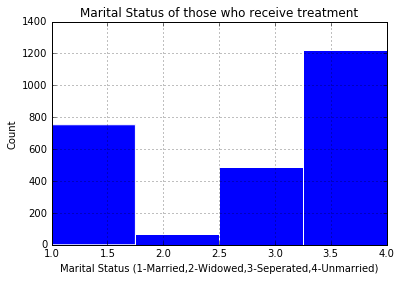

In [98]:
recv_trt.IRMARIT.hist(bins=4, edgecolor='w', lw=1)
recv_trt.IRMARIT.value_counts()/recv_trt.IRMARIT.count()
plt.title("Marital Status of those who receive treatment")
plt.xlabel("Marital Status (1-Married,2-Widowed,3-Seperated,4-Unmarried)")
plt.ylabel("Count")
#may be worth recoding as never married and married before
#but the pct of those who recv trt that are 2(widowed-2.7%) or 3(seperated-19.3%) are both twice 
#the pct of those who get no trt that are 2(widowed-1.9%) or 3(seperated-10.6%) reponses 
#seeking trt for psychological distress and being separated from a lifelong partner seem to have some kind of relationship
#however, a higher pct of those who seek trt are also married, which could have a few different explanations
#(possibly either marriage contributing to distress or the partner contributing to seeking trt)

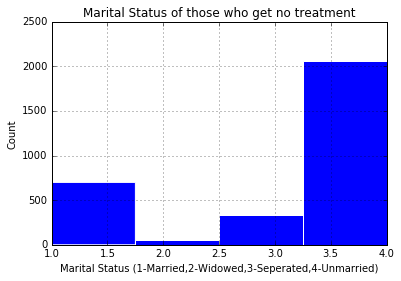

In [100]:
no_trt.IRMARIT.hist(bins=4,edgecolor='w', lw=1)
no_trt.IRMARIT.value_counts()/no_trt.IRMARIT.count()
plt.title("Marital Status of those who get no treatment")
plt.xlabel("Marital Status (1-Married,2-Widowed,3-Seperated,4-Unmarried)")
plt.ylabel("Count")
#There seems to be a larger proportion of those who never married not receiving trt for serious psychological distress
#this might mean that younger people are not receiving mh trt among other possible explanations

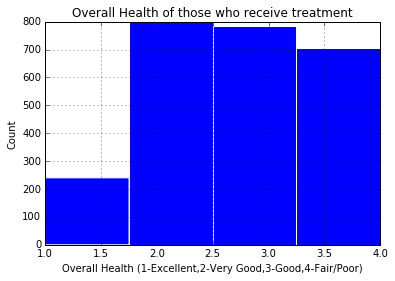

In [101]:
recv_trt.HEALTH2.hist(bins=4, edgecolor='w', lw=1) #overall health coded 1-excellent thru 4-fair/poor
recv_trt.HEALTH2.value_counts()/recv_trt.HEALTH2.count()
plt.title("Overall Health of those who receive treatment")
plt.xlabel("Overall Health (1-Excellent,2-Very Good,3-Good,4-Fair/Poor)")
plt.ylabel("Count")

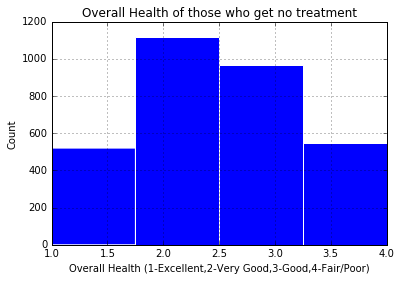

In [102]:
no_trt.HEALTH2.hist(bins=4, edgecolor='w', lw=1)
no_trt.HEALTH2.value_counts()/no_trt.HEALTH2.count()
plt.title("Overall Health of those who get no treatment")
plt.xlabel("Overall Health (1-Excellent,2-Very Good,3-Good,4-Fair/Poor)")
plt.ylabel("Count")
#lower proportion of fair/poor health(27 pct -> 17pct) and 
#higher proportion of excellent health(9pct -> 17pct) don't get treatment

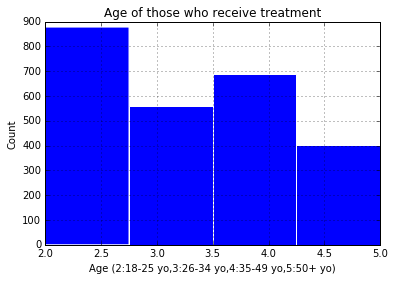

In [106]:
recv_trt.CATAG3.hist(bins=4,edgecolor='w', lw=1) #var 2-5 has 4 bins
recv_trt.CATAG3.value_counts()/recv_trt.CATAG3.count()
plt.title("Age of those who receive treatment")
plt.xlabel("Age (2:18-25 yo,3:26-34 yo,4:35-49 yo,5:50+ yo)")
plt.ylabel("Count")
#2    0.461552
#4    0.212430
#3    0.211201
#5    0.114817 this is the distribution of ages for sample experiencing serious psychological distress in past year
#seems like the older the adult, the more likely they are to receive trt for mental health

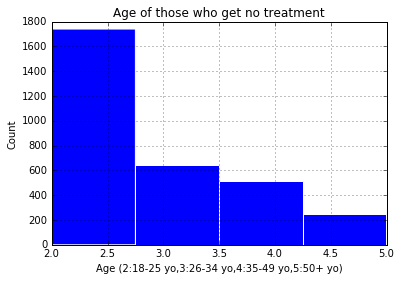

In [105]:
no_trt.CATAG3.hist(bins=4,edgecolor='w', lw=1) #var 2-5 has 4 bins
no_trt.CATAG3.value_counts()/no_trt.CATAG3.count()
plt.title("Age of those who get no treatment")
plt.xlabel("Age (2:18-25 yo,3:26-34 yo,4:35-49 yo,5:50+ yo)")
plt.ylabel("Count")
#this confirms my earlier suspicion that younger adults experiencing psychological distress are less likely to receive trt

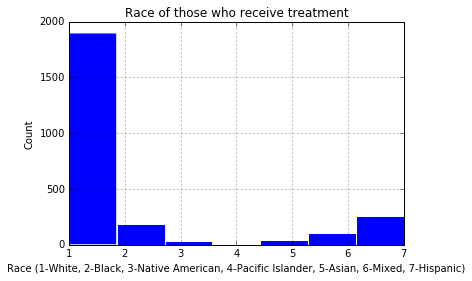

In [107]:
recv_trt.NEWRACE2.hist(bins=7,edgecolor='w', lw=1) #1-White, 2-Black, 3-Native American, 4-Pacific Islander, 5-Asian, 6-Mixed, 7-Hispanic
rtraceprop = (recv_trt.NEWRACE2.value_counts()/recv_trt.NEWRACE2.count()).sort_values()
plt.title("Race of those who receive treatment")
plt.xlabel("Race (1-White, 2-Black, 3-Native American, 4-Pacific Islander, 5-Asian, 6-Mixed, 7-Hispanic)")
plt.ylabel("Count")
#may be very predictive if grouped by white, non-white
#seems to be a very distinct trend of whites having access to mh treatment where other races have less access

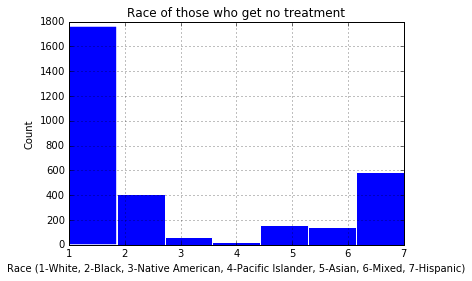

In [108]:
no_trt.NEWRACE2.hist(bins=7,edgecolor='w', lw=1)
ntraceprop = (no_trt.NEWRACE2.value_counts()/no_trt.NEWRACE2.count()).sort_values()
plt.title("Race of those who get no treatment")
plt.xlabel("Race (1-White, 2-Black, 3-Native American, 4-Pacific Islander, 5-Asian, 6-Mixed, 7-Hispanic)")
plt.ylabel("Count")
#3x pct asians, 2x pct black

3    0.338474
2    0.285884
4    0.234085
1    0.141558
Name: EDUCCAT2, dtype: float64

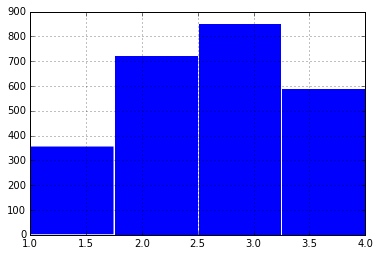

In [53]:
recv_trt.EDUCCAT2.hist(bins=4,edgecolor='w', lw=1) #1-White, 2-Black, 3-Native American, 4-Pacific Islander, 5-Asian, 6-Mixed, 7-Hispanic
recv_trt.EDUCCAT2.value_counts()/recv_trt.EDUCCAT2.count()

2    0.337460
3    0.314286
4    0.180317
1    0.167937
Name: EDUCCAT2, dtype: float64

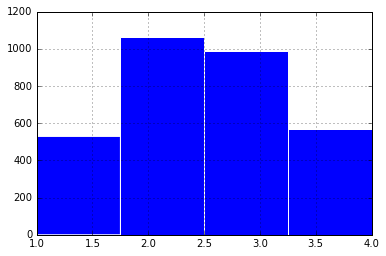

In [54]:
no_trt.EDUCCAT2.hist(bins=4,edgecolor='w', lw=1)
no_trt.EDUCCAT2.value_counts()/no_trt.EDUCCAT2.count()
#slightly higher prop of 1 and 2 (lower incomes), lower prop of 3 and 4 (higher incomes)

In [55]:
#MOST PREDICTIVE VARIABLES BASED ON MY INTUITION:
#AMHTXND2 - perceived need for trt, 
#K6SCMAX - psych distress score worst month, 
#WHODASC2 - another measure of psych distress,
#SMIPP_U, - prob of serious mental illness, 
#AMDELT - major depressive episode lifetime, 
#AMDEYR - major depressive episode past year, 
#IRSEX - gender, 
#IRMARIT - marital status(1-married,2-widowed,3-sep/div,4-unmarried), 
#HEALTH2 - overall health(1-excellent thru 4-fair/poor), 
#CATAG3 - age categories(2:18-25,3:26-34,4:35-49,5:50+), 
#NEWRACE2 - race categories(1-White, 2-Black, 3-Native American, 4-Pacific Islander, 5-Asian, 6-Mixed, 7-Hispanic)

In [56]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression

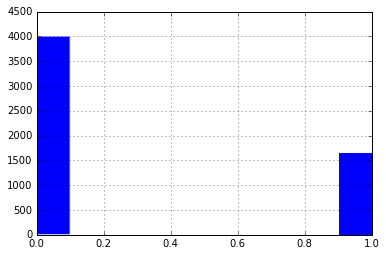

In [58]:
mh_sample.AMHTXND2.hist(edgecolor='w', lw=1)
#However, an even lower proportion of those adults have had a self-perceived need 
#for mental health treatment in the past year.

In [59]:
#this is the subset which was predicted to have a serious mental illness
#could provide some useful insights
mh_sample[mh_sample.SMIPP_U>.5].describe()

,AMHTXRC3,AMHSVTYP,AMHTXND2,K6SCMON,SPDMON,K6SCYR,K6SCMAX,SPDYR,WHODASC2,SMIPP_U,...,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,979.000000,975.000000,978.000000,979.000000,979.000000,861.000000,979.000000,979.0,979.000000,979.000000,...,979.000000,979.000000,967.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,0.703779,5.851282,0.555215,14.490296,0.648621,20.277584,20.182840,1.0,18.607763,0.719821,...,0.401430,2.102145,2.111686,0.821246,0.331971,2.971399,3.254341,2.262513,2.539326,2.938713
std,0.456823,2.006006,0.497196,5.374964,0.477645,3.305151,3.258507,0.0,4.095159,0.134518,...,0.490438,1.086158,0.842663,0.383342,0.471161,1.244702,1.069979,2.236419,0.968436,0.959466
min,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,13.000000,1.0,2.000000,0.500220,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,0.000000,11.000000,0.000000,18.000000,18.000000,1.0,16.000000,0.596952,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,1.000000,6.000000,1.000000,15.000000,1.000000,20.000000,20.000000,1.0,19.000000,0.730806,...,0.000000,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,1.000000,3.000000,3.000000
75%,1.000000,8.000000,1.000000,18.000000,1.000000,24.000000,24.000000,1.0,22.000000,0.837346,...,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,4.000000
max,1.000000,8.000000,1.000000,24.000000,1.000000,24.000000,24.000000,1.0,24.000000,0.929121,...,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,4.000000,4.000000


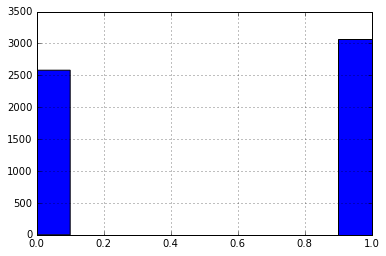

In [60]:
#make histograms for categorical vars
mh_sample.AMDELT.hist()

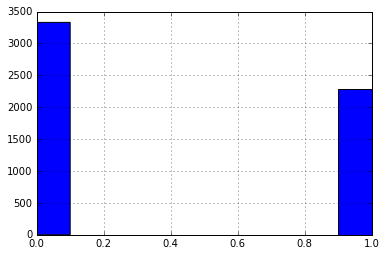

In [61]:
mh_sample.AMDEYR.hist()

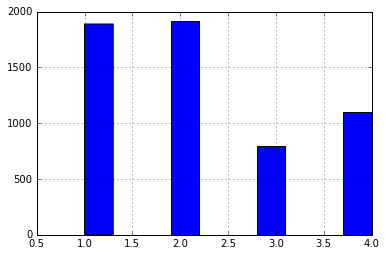

In [62]:
mh_sample.INCOME.hist()

count    5696.000000
mean        0.350948
std         0.477309
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: IRSEX, dtype: float64

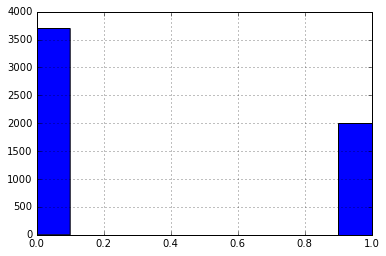

In [63]:
mh_sample.IRSEX.hist()
mh_sample.IRSEX.describe()
#now this is interesting, almost two thirds of the sample experiencing serious psychological distress is female

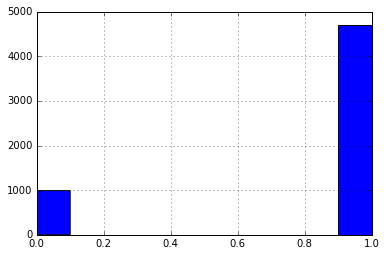

In [64]:
mh_sample.IRINSUR4.hist()
#most of the sample has some form of insurance

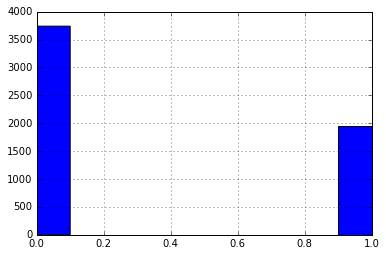

In [65]:
mh_sample.GOVTPROG.hist()
#2/3 not in govtprogam

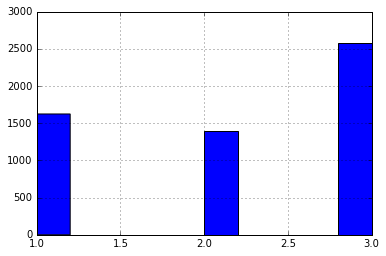

In [66]:
mh_sample.POVERTY2.hist()
#a little more than half are living within 2x the poverty level

4.0    0.577774
1.0    0.255442
3.0    0.144487
2.0    0.022296
Name: IRMARIT, dtype: float64

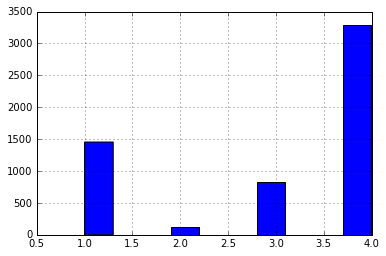

In [67]:
mh_sample.IRMARIT.hist()
mh_sample.IRMARIT.value_counts()/mh_sample.IRMARIT.count()
#half have never married

2    0.461552
4    0.212430
3    0.211201
5    0.114817
Name: CATAG3, dtype: float64

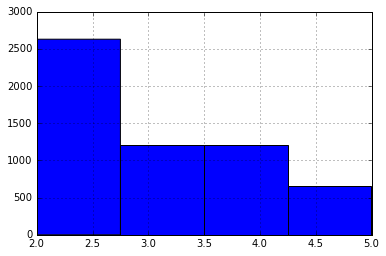

In [68]:
mh_sample.CATAG3.hist(bins=4)
mh_sample.CATAG3.value_counts()/mh_sample.CATAG3.count()
#compared to distribution of whole survey, age group 18-25 is over-represented

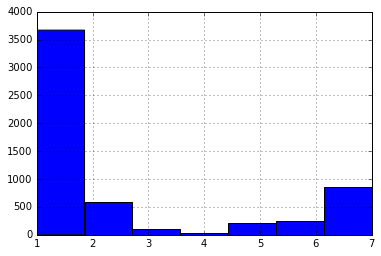

In [69]:
mh_sample.NEWRACE2.hist(bins=7)
#whole survey race distribution
#could be worth performing anova, but distribution looks similar enough
#1 = NonHisp White..................................60.67 pct
#2 = NonHisp Black/Afr Am ..........................12.11 pct
#3 = NonHisp Native Am/AK Native....................1.64 pct
#4 = NonHisp Native HI/Other Pac Isl ...............0.54 pct
#5 = NonHisp Asian..................................4.26 pct
#6 = NonHisp more than one race ....................3.54 pct
#7 = Hispanic.......................................17.23 pct

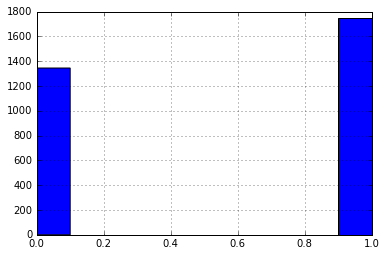

In [70]:
mh_sample.ATXMDEYR.hist()

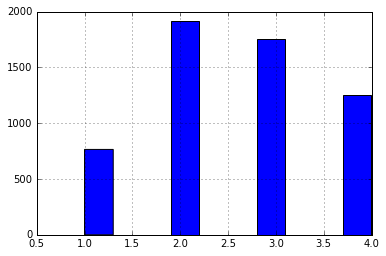

In [71]:
mh_sample.HEALTH2.hist()

In [72]:
#Substance: Among those who are coded TXNDILAL = 1(subsample of 5458 who need sub trtmnt),
#find predictors of TXILLALC =1(received sub trtmnt past year)

#TXNDILAL is grouping var, TXILLALC is response var, others are possible predictors
subdiag_cols = ['CASEID','TXNDILAL','TXGPILAL','TXILALEV','TXILLALC','ALCTRMT','ILLTRMT',
                'IRINSUR4','GOVTPROG','INCOME','POVERTY2','IRSEX','IRMARIT','HEALTH2',
                'CATAG3','NEWRACE2','EDUCCAT2']
Substance_Diagnostics = pd.read_csv('C:/Users/Cody/Downloads/NSDUH/2014/NSDUH-2014-DS0001-data/NSDUH-2014-DS0001-data-excel.tsv',usecols=subdiag_cols, sep='\t', index_col=0)
Substance_Diagnostics.describe()

,TXILALEV,ALCTRMT,ILLTRMT,TXILLALC,TXNDILAL,TXGPILAL,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000
mean,0.056485,0.010946,0.011217,0.018093,0.098750,0.087496,1.760164,2.585027,2.277343,1.121854,1.523765,14.387925,2.799533,2.551682,3.270504,2.182428
std,0.230859,0.104050,0.105318,0.133288,0.298328,0.282563,0.426987,1.138994,1.358044,0.327120,0.499439,31.407447,1.426004,2.366211,1.324381,0.952305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,1.000000,2.000000,4.000000,3.000000,1.000000,3.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,4.000000,5.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,2.000000,2.000000,99.000000,5.000000,7.000000,5.000000,4.000000


In [73]:
#change to N/A for missing data
Substance_Diagnostics.replace(-9, np.nan, inplace=True)
Substance_Diagnostics.IRMARIT.replace(99,np.nan,inplace=True)#1-married,2-widowed,3-seperated/div,4-never married
#change vars coded 1:yes, 2:no --> 1:yes, 0:no 
Substance_Diagnostics.GOVTPROG.replace(2,0,inplace=True)#participated in govt assistance program
Substance_Diagnostics.IRINSUR4.replace(2,0,inplace=True)#1-has insurance, 0-no insurance
Substance_Diagnostics.IRSEX.replace(2,0,inplace=True)#1-male, 0-female
Substance_Diagnostics.describe()

,TXILALEV,ALCTRMT,ILLTRMT,TXILLALC,TXNDILAL,TXGPILAL,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,54751.000000,55271.000000,55271.000000,48588.000000,55271.000000,55271.000000,55271.000000,55251.000000
mean,0.056485,0.010946,0.011217,0.018093,0.098750,0.087496,0.239836,2.585027,2.384450,0.878146,0.476235,2.750021,2.799533,2.551682,3.270504,2.186476
std,0.230859,0.104050,0.105318,0.133288,0.298328,0.282563,0.426987,1.138994,0.801514,0.327120,0.499439,1.391708,1.426004,2.366211,1.324381,0.928403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,0.000000,4.000000,3.000000,1.000000,3.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,1.000000,1.000000,4.000000,4.000000,5.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,5.000000,4.000000


In [74]:
#TXNDILAL is coded 1 if an individual meets any of the following three criteria
#1. Dependent on any illicit drug or alcohol in the past year (DPILLALC=1).
#2. Illicit drug or alcohol abuse in the past year (ABILLALC=1).
#3. Received treatment for illicit drug or alcohol use at a specialty facility in the past year including a hospital (inpatient),
#rehabilitation facility (in or outpatient), or mental health center (SPILLALC=1).
sub_sample = Substance_Diagnostics[Substance_Diagnostics.TXNDILAL == 1]
sub_sample.describe()

,TXILALEV,ALCTRMT,ILLTRMT,TXILLALC,TXNDILAL,TXGPILAL,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,5458.000000,5458.000000,5458.000000,5458.000000,5458.0,5458.000000,5458.000000,5458.000000,5360.000000,5458.000000,5458.000000,5331.000000,5458.000000,5458.000000,5458.000000,5458.000000
mean,0.256871,0.091425,0.098021,0.146757,1.0,0.886039,0.288750,2.359106,2.272761,0.818615,0.594357,3.294504,2.649872,2.507145,2.942287,2.370099
std,0.436947,0.288240,0.297371,0.353896,0.0,0.317793,0.453223,1.137122,0.835982,0.385372,0.491061,1.179693,1.152469,2.337174,1.245319,0.921154
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,2.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,3.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,5.000000,4.000000


0    0.853243
1    0.146757
Name: TXILLALC, dtype: float64

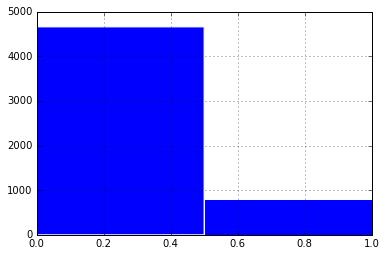

In [75]:
sub_sample.TXILLALC.hist(bins=2,edgecolor='w',lw=1)
sub_sample.TXILLALC.value_counts()/sub_sample.TXILLALC.count()
#85 pct of those who have substance abuse/dependence do not receive treatment for it

In [76]:
#grouped by the response variable TXILLALC (received trt for sub abuse/dependence)
recv_sub = sub_sample[sub_sample.TXILLALC == 1] #801 adults who recv trt for sub abuse/dependence that need it
no_sub = sub_sample[sub_sample.TXILLALC == 0] #4657 adults who get no trt for sub abuse/dependence that need it

In [77]:
no_sub.describe()

,TXILALEV,ALCTRMT,ILLTRMT,TXILLALC,TXNDILAL,TXGPILAL,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,4657.000000,4657.0,4657.0,4657.0,4657.0,4657.0,4657.000000,4657.000000,4564.000000,4657.000000,4657.000000,4551.000000,4657.000000,4657.000000,4657.000000,4657.000000
mean,0.129053,0.0,0.0,0.0,1.0,1.0,0.258750,2.408632,2.315294,0.821988,0.595877,3.292024,2.626798,2.531243,2.987116,2.332403
std,0.335295,0.0,0.0,0.0,0.0,0.0,0.437995,1.138156,0.822819,0.382564,0.490774,1.190521,1.138156,2.356158,1.230800,0.913511
min,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,1.000000,2.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,2.000000
50%,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,2.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,3.000000,2.000000
75%,0.000000,0.0,0.0,0.0,1.0,1.0,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,3.000000,3.000000,4.000000,3.000000
max,1.000000,0.0,0.0,0.0,1.0,1.0,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,5.000000,4.000000


1    0.622971
0    0.377029
Name: ALCTRMT, dtype: float64

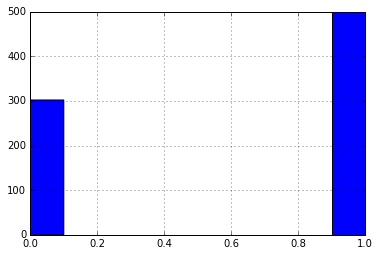

In [78]:
recv_sub.ALCTRMT.hist()
recv_sub.ALCTRMT.value_counts()/recv_sub.ALCTRMT.count()
#62 pct of those who recv trt get it for alc

1    0.667915
0    0.332085
Name: ILLTRMT, dtype: float64

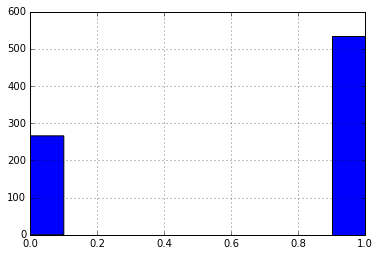

In [79]:
recv_sub.ILLTRMT.hist()
recv_sub.ILLTRMT.value_counts()/recv_sub.ILLTRMT.count()
#67 pct of those who recv trt get it for illicit drug use

0    0.776529
1    0.223471
Name: TXGPILAL, dtype: float64

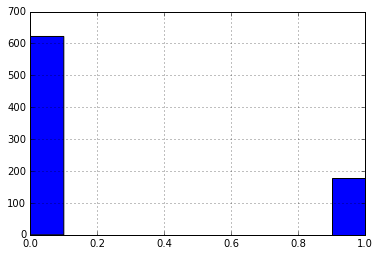

In [80]:
recv_sub.TXGPILAL.hist()
recv_sub.TXGPILAL.value_counts()/recv_sub.TXGPILAL.count()
#22 pct of those who recv trt don't get it at a specialty facility

0    0.536829
1    0.463171
Name: GOVTPROG, dtype: float64

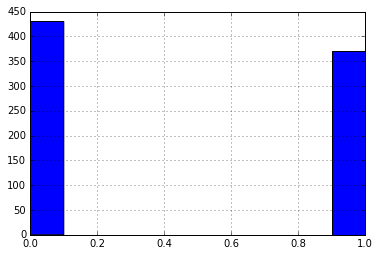

In [81]:
recv_sub.GOVTPROG.hist()
recv_sub.GOVTPROG.value_counts()/recv_sub.GOVTPROG.count()

0    0.74125
1    0.25875
Name: GOVTPROG, dtype: float64

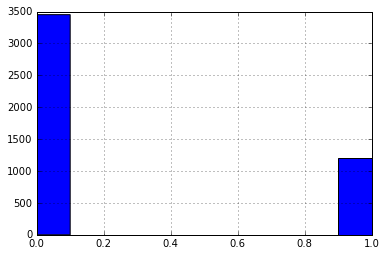

In [82]:
no_sub.GOVTPROG.hist()
no_sub.GOVTPROG.value_counts()/no_sub.GOVTPROG.count()